# First Piechart Example
This is a work in progress.  I am trying to create a pie chart using matplotlib.

INFO:util.data_loader:Loaded 402 records from "data/week_1/PrivacyhubDB.onoffpluginunitstates.json"
INFO:util.data_loader:Filtered data based on unique_id: 363 records remaining
INFO:util.data_loader:Filtered data based on change_types: 66 records remaining


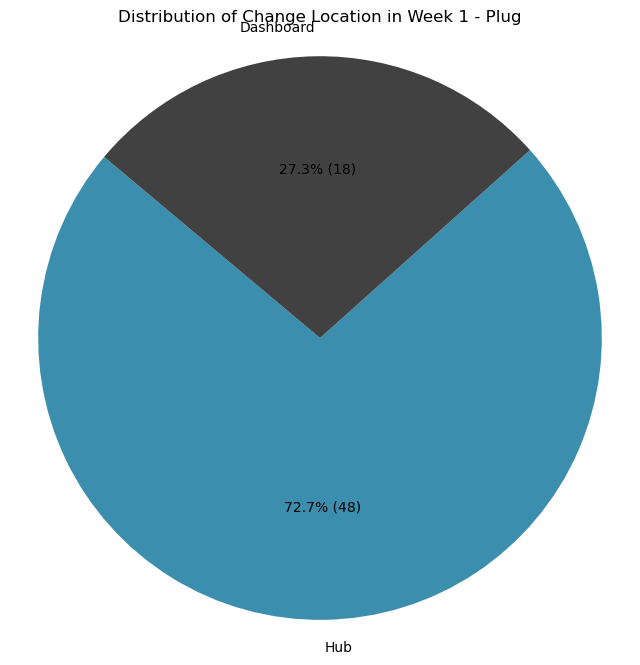

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
import util.data_loader as data_loader

device_type = data_loader.Device["PLUG"]
# unique_id = '13E56C4E1FD98745'  # Contact Sensor
unique_id = '39C0AE0A9852E5EE'  # Plug

data = data_loader.load_data(
    week=1,
    device_type=device_type,
    unique_id=unique_id,
    change_types=[data_loader.ChangeType["PRIVACY_STATE_HUB"], data_loader.ChangeType["PRIVACY_STATE_PROXY"]]
)

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["PRIVACY_STATE_HUB"]: 'Hub',
    data_loader.ChangeType["PRIVACY_STATE_PROXY"]: 'Dashboard',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Hub': '#3c8eae',
    'Dashboard': '#414141',
}

# Extract privacyState values
change_types = [change_type_mapping[item['changeType']] for item in data]

# Count occurrences of each privacyState
privacy_state_counts = Counter(change_types)

# Prepare data for pie chart
labels = privacy_state_counts.keys()
sizes = privacy_state_counts.values()

# Get the corresponding colors for each label
colors = [color_mapping[label] for label in labels]

# Custom function to display the absolute count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=autopct_format(sizes), startangle=140, colors=colors)
plt.title(f'Distribution of Change Location in Week 1 - {data_loader.device_name_mapping[device_type]}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig('privacy_states_distribution.svg', format='svg')

plt.show()
